In [192]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pylab as plt
import seaborn as sns

## Problem Statement

## Data Gathering

In [24]:
loan = pd.read_csv("Loan_defualter.csv")
loan.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [25]:
loan.shape

(10000, 14)

In [26]:
loan.isna().sum().sum()

0

In [27]:
loan.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
(loan.isna().sum() / loan.shape[0])*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [29]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
loan.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Feature Engineering

#### Column 1. Rownumber

In [31]:
# loan["RowNumber"]

In [32]:
loan["RowNumber"].nunique() / loan.shape[0] * 100   ## 100% unique value so it not useful to us we can remove it

100.0

In [33]:
loan.drop("RowNumber",axis=1,inplace=True)

#### Column 2 . CustomerId

In [34]:
loan["CustomerId"]

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

In [36]:
# loan["CustomerId"].value_counts()

In [37]:
loan["CustomerId"].nunique()

10000

In [38]:
loan.drop("CustomerId",axis=1,inplace=True)

### Column 3 Surname

In [40]:
# loan["Surname"]

In [41]:
loan["Surname"].nunique()

2932

In [42]:
loan["Surname"].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [43]:
loan.drop("Surname",axis=1,inplace=True)

In [44]:
loan

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [48]:
# plt.figure(figsize=(10,8))
# sns.heatmap(loan.corr(),annot=True)

#### Column 4 CreditScore

In [49]:
loan["CreditScore"]

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [52]:
# loan["CreditScore"].value_counts()

C:\Users\CHETAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore'>

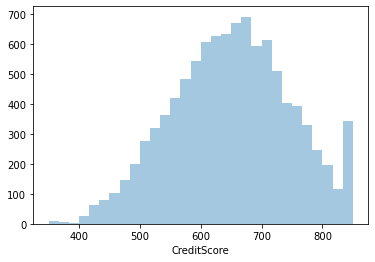

In [54]:
sns.distplot(loan['CreditScore'],kde=False,bins=30)

In [51]:
loan.loc[loan["CreditScore"] > 700]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
19,726,France,Female,24,6,0.00,2,1,1,54724.03,0
20,732,France,Male,41,8,0.00,2,1,1,170886.17,0
24,846,France,Female,38,5,0.00,1,1,1,187616.16,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### Column 5 Geography

#### One Hot Encoding

In [56]:
loan["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [61]:
loan["Geography"].nunique()

3

In [81]:
one_hot_encoder = pd.get_dummies(loan["Geography"])
one_hot_encoder

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


#### Column 6 Gender

### Label_Encoding

In [79]:
loan["Gender"].nunique()

2

In [80]:
loan["Gender"].value_counts()   ## Balance data

Male      5457
Female    4543
Name: Gender, dtype: int64

In [84]:
loan["Gender"].replace({"Male":0,"Female":1},inplace=True)

In [86]:
loan.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [87]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


#### Column 7 Age

In [89]:
loan["Age"].nunique()

70

In [90]:
loan["Age"].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

C:\Users\CHETAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

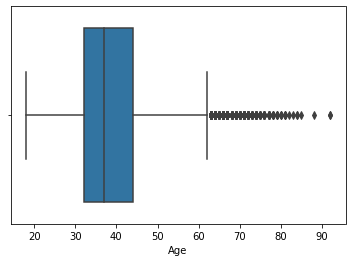

In [91]:
sns.boxplot(loan["Age"])

### Column 8 Tenure

In [93]:
loan["Tenure"].nunique()

11

In [97]:
# loan["Tenure"].value_counts()

In [98]:
# loan.loc[loan["Tenure"] == 10]

C:\Users\CHETAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure'>

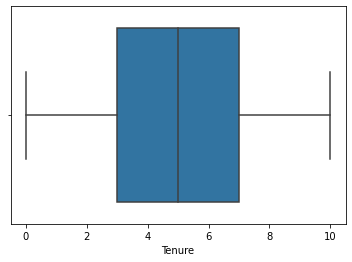

In [99]:
sns.boxplot(loan["Tenure"])

### Column 9  Balance

In [101]:
# loan["Balance"]

In [105]:
loan.loc[(loan["Balance"] == 0) & (loan["Exited"]==0)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,699,France,1,39,1,0.0,2,0,0,93826.63,0
6,822,France,0,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,0,24,3,0.0,2,1,0,76390.01,0
12,476,France,1,34,10,0.0,2,1,0,26260.98,0
13,549,France,1,25,5,0.0,2,0,0,190857.79,0
...,...,...,...,...,...,...,...,...,...,...,...
9988,775,France,0,30,4,0.0,2,1,0,49337.84,0
9989,841,Spain,0,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,0,36,2,0.0,1,1,0,195192.40,0
9994,800,France,1,29,2,0.0,2,0,0,167773.55,0


In [106]:
loan["Balance"].nunique()

6382

In [109]:
loan["Balance"].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

C:\Users\CHETAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

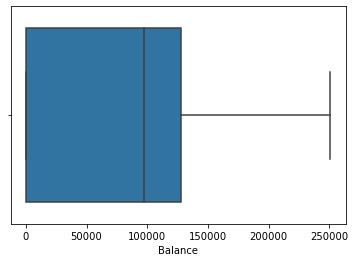

In [107]:
sns.boxplot(loan["Balance"])

### Column 10 NumOfProducts

In [110]:
loan["NumOfProducts"].nunique()

4

In [111]:
loan["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

### Column 11. HasCrCard

In [113]:
loan["HasCrCard"].nunique()

2

### Column 12. IsActiveMember

In [115]:
loan["IsActiveMember"].nunique()

2

### Column 13. EstimatedSalary

In [118]:
# loan["EstimatedSalary"]

In [117]:
loan["EstimatedSalary"].nunique()

9999

In [120]:
# loan["EstimatedSalary"].value_counts()

C:\Users\CHETAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

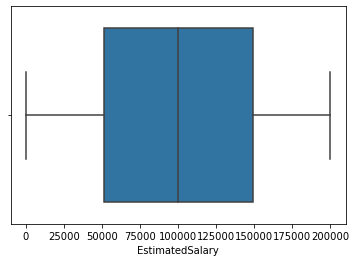

In [121]:
sns.boxplot(loan["EstimatedSalary"])

### Column 14. Exited

#### Target Column and has imbalanced data set

In [123]:
loan["Exited"].nunique()

2

In [125]:
loan["Exited"].value_counts() / loan.shape[0] * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

## Feature Selection

In [126]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


<AxesSubplot:>

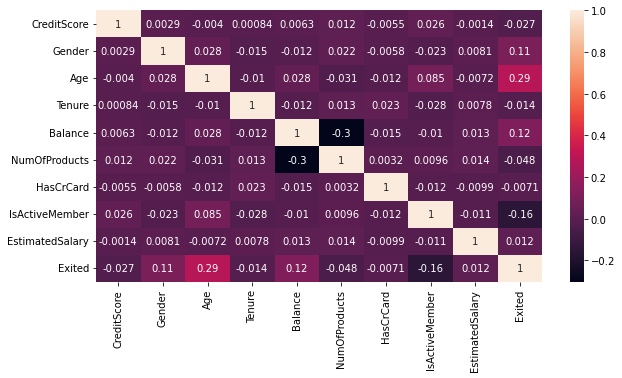

In [130]:
plt.figure(figsize=(10,5))
sns.heatmap(loan.corr(),annot=True)

<AxesSubplot:xlabel='Exited', ylabel='Count'>

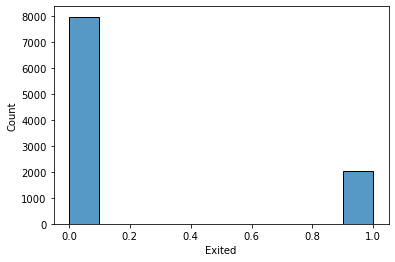

In [134]:
sns.histplot(loan["Exited"],bins=10)

C:\Users\CHETAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

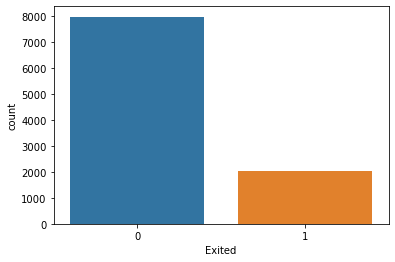

In [151]:
sns.countplot(loan["Exited"])

## Train-Test Split

In [135]:
loan.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [136]:
x = loan.drop(["Geography","Exited"],axis=1)
y = loan["Exited"]

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3,stratify=y)

## Model Training

In [138]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

In [140]:
y_pred[5:10]

array([0, 0, 0, 0, 0], dtype=int64)

In [141]:
y_test[5:10]

4976    0
5958    0
3747    0
2449    1
2408    0
Name: Exited, dtype: int64

## Model Evaluation

In [156]:
print("****************Testing Accuracy******************")
confuse = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",confuse)

accuracy_value = accuracy_score(y_test,y_pred)
print("Accuracy Score :",accuracy_value)

****************Testing Accuracy******************
Confusion Matrix :
 [[2341   48]
 [ 588   23]]
Accuracy Score : 0.788


In [157]:
y_pred_train = log_model.predict(x_train)
print("****************Training Accuracy******************")
confuse = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",confuse)

accuracy_value = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :",accuracy_value)

****************Training Accuracy******************
Confusion Matrix :
 [[5459  115]
 [1345   81]]
Accuracy Score : 0.7914285714285715


#### Using SMOTE Technique For imbalance data

In [153]:
from imblearn.over_sampling import SMOTE

In [154]:
sm = SMOTE(random_state=10)
x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train)

In [160]:
y_train_smote.value_counts()

1    5574
0    5574
Name: Exited, dtype: int64

<AxesSubplot:>

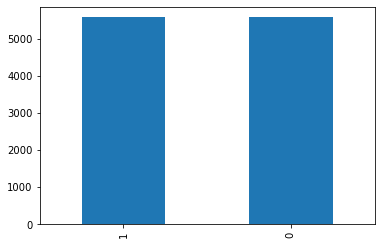

In [155]:
y_train_smote.value_counts().plot(kind="bar")

#### Train Model on Balanced Data

In [161]:
balance = LogisticRegression()
balance.fit(x_train_smote,y_train_smote)
y_pred_smote = balance.predict(x_test)

In [163]:
smote_accuracy = accuracy_score(y_test,y_pred_smote)
print("Accuracy Score is ", smote_accuracy)

smote_confuse = confusion_matrix(y_test,y_pred_smote)
print("Confusion Matrix :\n",confuse)

Accuracy Score is  0.6583333333333333
Confusion Matrix :
 [[5459  115]
 [1345   81]]


In [166]:
y_pred_train_smote = balance.predict(x_train)
smote_accuracy = accuracy_score(y_train,y_pred_train_smote)
print("Accuracy Score is ", smote_accuracy)

smote_confuse = confusion_matrix(y_train,y_pred_train_smote)
print("Confusion Matrix :\n",confuse)

Accuracy Score is  0.6525714285714286
Confusion Matrix :
 [[5459  115]
 [1345   81]]


## ROC-AUC Curve

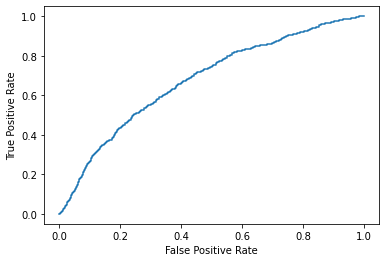

In [149]:
y_pred_proba = log_model.predict_proba(x_test)[::,1]
fpr, tpr, _ =roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [169]:
accuracy = {"Model":["Logistic","SMOTE","Decision-Tree","Random-Forest","KNN"],
           "Training_Accuracy":[78.99,65.21,np.nan,np.nan,np.nan],
           "Testing_Accuracy":[79.34,65.23,np.nan,np.nan,np.nan]}
all_model = pd.DataFrame(accuracy)
all_model

,Model,Training_Accuracy,Testing_Accuracy
0,Logistic,78.99,79.34
1,SMOTE,65.21,65.23
2,Decision-Tree,NaN,NaN
3,Random-Forest,NaN,NaN
4,KNN,NaN,NaN


# Random-Forest

criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,

In [177]:
y_test

8472    0
4545    0
6091    0
1816    0
5070    0
       ..
9743    0
8311    1
2832    0
5957    0
5647    0
Name: Exited, Length: 3000, dtype: int64

In [179]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
prediction = rf_model.predict(x_test)

accuracy = accuracy_score(y_test,prediction)
print("Accuracy Score is ", accuracy)

confuse = confusion_matrix(y_test,prediction)
print("Confusion Matrix :\n",confuse)

Accuracy Score is  0.856
Confusion Matrix :
 [[2297   92]
 [ 340  271]]


In [180]:
training_prediction = rf_model.predict(x_train)
train_accuracy = accuracy_score(y_train,training_prediction)
print("Accuracy Score is ", train_accuracy)

train_confuse = confusion_matrix(y_train,training_prediction)
print("Confusion Matrix :\n",train_confuse)

Accuracy Score is  1.0
Confusion Matrix :
 [[5574    0]
 [   0 1426]]


### Hyper-Parameter Tuning

#### GridSearchCV

In [183]:
hyper_para = {"criterion":['gini',"entropy"],
    "max_depth":np.arange(5,12),
    "min_samples_split":np.arange(4,8),
    "min_samples_leaf":np.arange(8,12)}

gscv_model = GridSearchCV(rf_model,hyper_para,cv=5)
gscv_model.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
                         'min_samples_leaf': array([ 8,  9, 10, 11]),
                         'min_samples_split': array([4, 5, 6, 7])})

In [184]:
gscv_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 11,
 'min_samples_split': 4}

In [185]:
rf_hyper_model = RandomForestClassifier(criterion="gini",max_depth=10,min_samples_leaf=11,min_samples_split=4)
rf_hyper_model.fit(x_train,y_train)
hyper_prediction = rf_model.predict(x_test)

In [187]:
print("***************Hyper-Testing******************")
accuracy = accurarf_hyper_modelcy_score(y_test,hyper_prediction)
print("Accuracy Score is ", accuracy)

confuse = confusion_matrix(y_test,hyper_prediction)
print("Confusion Matrix :\n",confuse)

***************Hyper-Training******************
Accuracy Score is  0.856
Confusion Matrix :
 [[2297   92]
 [ 340  271]]


In [191]:
print("***************Hyper-Training******************")

hyper_prediction_train = rf_hyper_model.predict(x_train)
accuracy = accuracy_score(y_train,hyper_prediction_train)
print("Accuracy Score is ", accuracy)

confuse = confusion_matrix(y_train,hyper_prediction_train)
print("Confusion Matrix :\n",confuse)

***************Hyper-Training******************
Accuracy Score is  0.8697142857142857
Confusion Matrix :
 [[5462  112]
 [ 800  626]]


In [193]:
rf_hyper_model.feature_importances_

array([0.06151786, 0.02175809, 0.38176349, 0.03428585, 0.09012026,
       0.2568813 , 0.00535624, 0.08797853, 0.06033839])

In [194]:
array= {"Features":x.columns,
       "Importance":rf_hyper_model.feature_importances_}
features = pd.DataFrame(array)
features

,Features,Importance
0,CreditScore,0.061518
1,Gender,0.021758
2,Age,0.381763
3,Tenure,0.034286
4,Balance,0.090120
5,NumOfProducts,0.256881
6,HasCrCard,0.005356
7,IsActiveMember,0.087979
8,EstimatedSalary,0.060338


# KNN 

In [195]:
knn_model = KNeighborsClassifier()
